In [9]:
import tensorflow as tf
import serial
import time
# import cv2
import numpy as np
import matplotlib.pyplot as plt
import base64

im2 = ""


def load_images(i=0,n=10): # i = init  ,n = final of dataset
    # PATH = "./saved/img/im_28x28_140.png"
    
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # bin = cv2.imencode('png',im)
    
    return test_images[i:n], test_labels[i:n]


<p>Plote algumas roupas<p/>

shape im: (10, 28, 28), shape label: (10,)


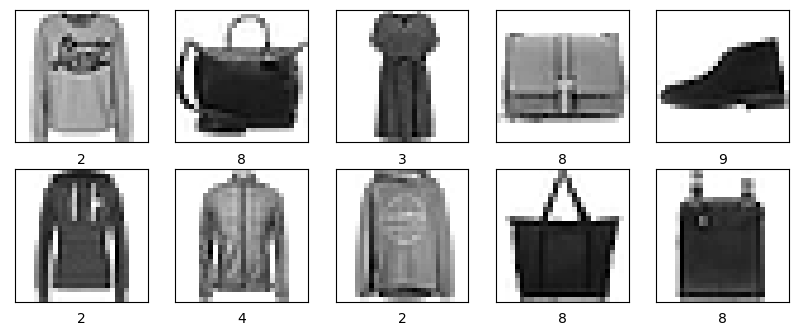

In [2]:
I = 520
N = 530
LENGHT = N-I

images, labels = load_images(I,N)
print(f'shape im: {images.shape}, shape label: {labels.shape}')

plt.figure(figsize=(10,10))
for i in range(LENGHT):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()


<p>converter matrix para base64, no envio <p/>

In [19]:
base = base64.b64encode(images[0]) #images[0].tobytes()
conv = base64.b64decode(base)
byte_img = np.ndarray([28,28],'uint8',conv)

In [21]:
print(f'base64: {base}')
print(f'bytes: {conv}')

base64: b'AAAAAAAAAAAAN1IAAAAAAE9SAAAAAAAAAAAAAAAAAAAAACRnemn1tKDSyLDfl3dtLgAAAAAAAAAAAAAAADaMbWRWSqq4vayZcVJpdIdnAAAAAAAAAAAAAAByaVxkX1JWkpeggVpfZl9hlDMAAAAAAAAAAAAsgVlfYWdZP0lPUlFeYl9pX3lnAAAAAAAAAAAARHRmWV5KYZQ+VlZWVk9hYmGHfAAAAAAAAAAAAFFnelJRTujHak5MWVSCdzF8hHkJAAAAAAAAAABaZIJaOpK9h/+tsr2w48fonXR1HwAAAAAAAAAAYmKKXzeVZM13QU4pWW2dhIVpdykAAAAAAAAAAGdfh2Qhp3V9crKZ4Kqknz6NYnQ3AAAAAAAAAARiXoFSV7SSl6K8hKSkymF0j15vQQAAAAAAAAAPYWp0jcDKus9hvIWCuN3wzYRcbUwAAAAAAAAAEWFsdHHKQXTNr5+XsOqkTDaUX2pZAAAAAAAAAAxeanxMQUwvTn+UgnJXOklXnV9nZwAAAAAAAAAbX2SFYlZZSUdEMzY3WmdWTqJfXnEAAAAAAAAAHF9ekmJJWUpWX15WUVxmX0ykalp0AQAAAAAAAB5aT490VFpKVFlZVFFZbGdJoHJSbxEAAAAAAAAfX2mld1JeSVRaWldRVmxtRp16THIeAAAAAAAAJFl1r3VXVEpZX1RXVFRkekeff0x3KQAAAAAAACteZrJ9V09OWV5UWVRXZHxMqolPaikAAAAAAAAxXFzFd1lRT1daVFxWWlx9YZSKUXcsAAAAAAAAPl9OvX1ZT1JZXFJXVllWd3dth1x0NwAAAAAAADpiTqh3X05SWVxUVlpaVml9X4VfdD4AAAAAAAA0ZFSfal9PVlpaWVlZWlpefFqSZHRBAAAAAAAANmxWnYFkSk5ST1ZWVlJaWoR3qGdsRgAAAAAAADN0Wp8uXm9vdHR1dXV0dXxkDJ9vckIAAAAAAAAkcmekAAAMIyEjIS


<p>checar base64<p/>

In [23]:
ser = serial.Serial('COM5',115200,timeout=1)
ser.write(base)
ser.flush()
time.sleep(1)
print(ser.readline())
ser.close()

b'AAAAAAAAAAAAN1IAAAAAAE9SAAAAAAAAAAAAAAAAAAAAACRnemn1tKDSyLDfl3dtLgAAAAAAAAAAAAAAADaMbWRWSqq4vayZcVJpdIdnAAAAAAAAAAAAAAByaVxkX1JWkpeggVpfZl9hlDMAAAAAAAAAAAAsgVlfYWdZP0lPUlFeYl9pX3lnAAAAAAAAAAAARHRmWV5KYZQ+VlZWVk9hYmGHfAAAAAAAAAAAAFFnelJRTujHak5MWVSCdzF8hHkJAAAAAAAAAABaZIJaOpK9h/+tsr2w48fonXR1HwAAAAAAAAAAYmKKXzeVZM13QU4pWW2dhIVpdykAAAAAAAAAAGdfh2Qhp3V9crKZ4Kqknz6NYnQ3AAAAAAAAAARiXoFSV7SSl6K8hKSkymF0j15vQQAAAAAAAAAPYWp0jcDKus9hvIWCuN3wzYRcbUwAAAAAAAAAEWFsdHHKQXTNr5+XsOqkTDaUX2pZAAAAAAAAAAxeanxMQUwvTn+UgnJXOklXnV9nZwAAAAAAAAAbX2SFYlZZSUdEMzY3WmdWTqJfXnEAAAAAAAAAHF9ekmJJWUpWX15WUVxmX0ykalp0AQAAAAAAAB5aT490VFpKVFlZVFFZbGdJoHJSbxEAAAAAAAAfX2mld1JeSVRaWldRVmxtRp16THIeAAAAAAAAJFl1r3VXVEpZX1RXVFRkekeff0x3KQAAAAAAACteZrJ9V09OWV5UWVRXZHxMqolPaikAAAAAAAAxXFzFd1lRT1daVFxWWlx9YZSKUXcsAAAAAAAAPl9OvX1ZT1JZXFJXVllWd3dth1x0NwAAAAAAADpiTqh3X05SWVxUVlpaVml9X4VfdD4AAAAAAAA0ZFSfal9PVlpaWVlZWlpefFqSZHRBAAAAAAAANmxWnYFkSk5ST1ZWVlJaWoR3qGdsRgAAAAAAADN0Wp8uXm9vdHR1dXV0dXxkDJ9vckIAAAAAAAAkcmekAAAMIyEjISEhIRQAAA